In [1]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import re

In [2]:
df = pd.read_csv('single locations joined in 2024 .csv')
df1 = df[df['Churn or Retain'] == 'Retain']
df2 = df[(df['Churn or Retain'] == 'Churn') & (df['lifetime in Month'] <= 6) & (df['lifetime in Month'] >= 1)]
#df2 = df[df['Churn or Retain'] == 'Churn']
df_all = pd.concat([df1, df2], ignore_index=True)
TAG = "(LOCATION_FEATURE_ACCESS_AND_USAGE_BY_MONTH)"

# Build rename map only for columns that contain the tag
rename_map = {}
for col in df_all.columns:
    if TAG in col:
        # remove the tag first
        base = col.replace(TAG, "").strip()
        # then re-add the tag at the end
        new_name = f"{base}".strip()
        # normalize spaces
        new_name = " ".join(new_name.split())
        rename_map[col] = new_name

# Apply rename
df_all = df_all.rename(columns=rename_map)

# (optional) check what changed
print(rename_map)
df_all

{'Month of Month Ending (First MRR Month) (LOCATION_FEATURE_ACCESS_AND_USAGE_BY_MONTH)': 'Month of Month Ending (First MRR Month)', 'Inbound Sms Count (LOCATION_FEATURE_ACCESS_AND_USAGE_BY_MONTH)': 'Inbound Sms Count', 'Outbound Sms Count (LOCATION_FEATURE_ACCESS_AND_USAGE_BY_MONTH)': 'Outbound Sms Count', 'Automated Sms Sent Count (LOCATION_FEATURE_ACCESS_AND_USAGE_BY_MONTH)': 'Automated Sms Sent Count', 'Manual Messages Sms Count (LOCATION_FEATURE_ACCESS_AND_USAGE_BY_MONTH)': 'Manual Messages Sms Count', 'Inbound Call Count (LOCATION_FEATURE_ACCESS_AND_USAGE_BY_MONTH)': 'Inbound Call Count', 'Outbound Call Count (LOCATION_FEATURE_ACCESS_AND_USAGE_BY_MONTH)': 'Outbound Call Count'}


,Count of FINANCE_ID,Slug,Finance Id,First Month (First MRR Month),Month Ending (Last MRR Month),lifetime in Month,Lifetime Months,Gap,Location Id,Month of Month Ending (First MRR Month),...,Month 7 to 9 Reasons,Month 10 to 12 Reasons,Practice Management Software,Number of Swat,Integrations,Account Status,Reason Billing,Reason Phone System,Reason Data Sync,Reason Auto Reminders
0,4579,s00241492,241492,2024-03-31 00:00:00,2025-09-18 00:00:00,18,19,-1,3fd90b45-5c8e-42f5-bb99-eaec08f097a8,NaN,...,NaN,NaN,Dentrix (find/update software version),NaN,dentrixg5,Active,0.0,1.0,0.0,0.0
1,4579,s00099349,99349,2024-01-31 00:00:00,2025-09-18 00:00:00,20,21,-1,dfdb3aa0-f418-4e7b-aad1-d7b7c86eaf2a,NaN,...,"{""Phone"":1}",NaN,AVImark,NaN,avimark,Active,0.0,2.0,0.0,2.0
2,4579,s00456282,456282,2024-12-31 00:00:00,2025-09-18 00:00:00,9,10,-1,00f5b28a-fd31-467b-8eef-165aec6494c3,2024-12,...,NaN,NaN,Cornerstone,NaN,cornerstone,Active,NaN,NaN,NaN,NaN
3,4579,s00213292,213292,2024-12-31 00:00:00,2025-09-18 00:00:00,9,10,-1,0121724c-fd13-49d9-b06e-a856aca53e31,2024-12,...,NaN,NaN,Eaglesoft 18+,NaN,Eaglesoft 18,Active,NaN,NaN,NaN,NaN
4,4579,s00610088,610088,2024-03-31 00:00:00,2025-09-18 00:00:00,18,19,-1,e6a6a2c7-e01a-4511-a52f-ed3c60acc74c,2024-03,...,NaN,NaN,OfficeMate Version(s) 10+,NaN,Office Mate,Active,2.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4222,4579,s00653851,653851,2024-10-31 00:00:00,2024-12-31 00:00:00,1,3,-1,ac072f02-d0f0-4a50-bc6a-c5448e634976,2024-10,...,NaN,NaN,Square,1.0,NaN,Canceled,NaN,NaN,NaN,NaN
4223,4579,s00564909,564909,2024-02-29 00:00:00,2024-04-30 00:00:00,1,3,-1,53d49e6c-19d6-4ab4-b5a2-14f9b09cad5c,2024-02,...,NaN,NaN,Eclipse,1.0,NaN,Canceled,NaN,NaN,NaN,NaN
4224,4579,s00558384,558384,2024-02-29 00:00:00,2024-04-30 00:00:00,1,3,-1,6c21e2b0-4cbb-47c3-8250-edcd9040ed72,2024-02,...,NaN,NaN,Microsoft Products,1.0,NaN,Canceled,0.0,0.0,0.0,0.0
4225,4579,s00622390,622390,2024-06-30 00:00:00,2024-08-31 00:00:00,1,3,-1,1f5f5103-1502-459b-9564-fcf446c4ce69,NaN,...,NaN,NaN,Aesthetic Record,1.0,NaN,Canceled,3.0,0.0,0.0,0.0


In [3]:
df_all.drop(columns=[
    'Count of FINANCE_ID',
    'ListAggDistinct of Cancel Summary (SWAT_CASE)',
    'Created Date (SWAT_CASE)',
    'filter',
    'Max of Cancel Summary (SWAT_CASE)'
], inplace=True)
df_all = df_all.dropna(subset=['Slug', 'Finance Id', 'Location Id', 'Location Name'])
df_all.dropna(how='all', axis=1, inplace=True)
cols = [f"Week {i} Cases" for i in range(1, 13)]
df_all.dropna(subset=cols, how='any', inplace=True)  # axis=0 is default
cols_1 = ['Inbound Sms Count',
     'Outbound Sms Count',
    'Automated Sms Sent Count',
    'Manual Messages Sms Count',
    'Inbound Call Count',
     'Outbound Call Count',
     ]
df_all.dropna(subset=cols_1, how='any', inplace=True)  # axis=0 is default

# List of target columns
feature_cols = [
    'Inbound Sms Count',
    'Outbound Sms Count',
    'Automated Sms Sent Count',
    'Manual Messages Sms Count',
    'Inbound Call Count',
    'Outbound Call Count'
]

# For each col, add a new flag col
for col in feature_cols:
    new_col = f"{col} Activated"
    df_all[new_col] = (df_all[col] > 9).astype(int)   # 1 if value > 9, else 0

df_all.dropna(subset = ['Core Industry','Practice Management Software','Starting Bundle'], how = 'any', inplace= True)
# Define rules
conditions = [
    df_all["Starting Bundle"].str.contains("WeaveCore", case=False, na=False),
    df_all["Starting Bundle"].str.contains("WeavePlus", case=False, na=False),
]
choices = ["core bundle", "plus bundle"]

# Add First Month SWAT Cases column to df_all
df_all["First Month SWAT Cases"] = (
    df_all["Week 1 Cases"]
    + df_all["Week 2 Cases"]
    + df_all["Week 3 Cases"]
    + df_all["Week 4 Cases"]
)

# Apply rules
df_all["BundleType"] = np.select(conditions, choices, default="other")

# Regex: Eaglesoft | Open Dental | Dentrix G5 / G5+ / G6 / G6.2-7 / G7
eod_pattern = re.compile(r"(Eaglesoft|Open\s*Dental|Dentrix\s*(G5\+?|G6(?:\.2-7)?|G7))",
                         flags=re.IGNORECASE)

df_all["PMS_Group"] = np.where(
    df_all['Practice Management Software'].astype(str).str.contains(eod_pattern, na=False),
    "EOD pms",
    "Others"
)

reason_cols = [
    "Reason Billing",
    "Reason Phone System",
    "Reason Data Sync"
]

for col in reason_cols:
    df_all[col + " Flag"] = (df_all[col] > 0).astype(int)

cols_to_dummy = ['Core Industry','PMS_Group','BundleType']  # <-- your categorical columns
df_all = pd.get_dummies(
    df_all,
    columns=cols_to_dummy,
    drop_first=False,   # avoid multicollinearity for regression with intercept
    dummy_na=False,    # set True if you want a column for NaN
    dtype="int8"       # compact dtype
)

df_all["churn_flag"] = df_all["Churn or Retain"].map({"Churn": 1, "Retain": 0})
#df_all = df_all.dropna()
pd.DataFrame([df_all.columns]).T

/var/folders/4x/2k_662s11w3498vbf_1sv9q00000gn/T/ipykernel_15981/409499951.py:60: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_all['Practice Management Software'].astype(str).str.contains(eod_pattern, na=False),


,0
0,Slug
1,Finance Id
2,First Month (First MRR Month)
3,Month Ending (Last MRR Month)
4,lifetime in Month
...,...
79,PMS_Group_Others
80,BundleType_core bundle
81,BundleType_other
82,BundleType_plus bundle


In [4]:
pd.DataFrame([df_all.columns]).T.to_csv("columns_col.csv", index=False, header=False)

In [5]:
# Define predictors (X) and response variable (y)
X = df_all[["Core Industry_Medical",
       "BundleType_core bundle",
           'Week 1 Cases', 'Week 2 Cases',
       'Week 3 Cases', 'Week 4 Cases',#"First Month SWAT Cases",
      'Inbound Sms Count Activated',
     'Outbound Sms Count Activated',
    #'Automated Sms Sent Count Activated',
    #'Manual Messages Sms Count Activated',
    'Inbound Call Count Activated',
     'Outbound Call Count Activated',
            #'Inbound Sms Count',
    #'Outbound Sms Count',
    #'Automated Sms Sent Count',
    #'Manual Messages Sms Count',
    #'Inbound Call Count',
    # 'Outbound Call Count',
    #'Reason Billing Flag',
    #"Reason Phone System Flag",
    "Reason Data Sync Flag",
    "PMS_Group_EOD pms"
]]


y = df_all["churn_flag"]


In [6]:
df_all.groupby('churn_flag').count()

,Slug,Finance Id,First Month (First MRR Month),Month Ending (Last MRR Month),lifetime in Month,Lifetime Months,Gap,Location Id,Month of Month Ending (First MRR Month),Location Name,...,Core Industry_Dental,Core Industry_Medical,Core Industry_Optometry,Core Industry_Other,Core Industry_Veterinary,PMS_Group_EOD pms,PMS_Group_Others,BundleType_core bundle,BundleType_other,BundleType_plus bundle
churn_flag,,,,,,,,,,,,,,,,,,,,,
0,2843,2843,2843,2843,2843,2843,2843,2843,2843,2843,...,2843,2843,2843,2843,2843,2843,2843,2843,2843,2843
1,339,339,339,339,339,339,339,339,339,339,...,339,339,339,339,339,339,339,339,339,339


In [7]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

from sklearn.calibration import CalibratedClassifierCV
from sklearn.frozen import FrozenEstimator
from sklearn.metrics import (
    accuracy_score, precision_recall_fscore_support,
    roc_auc_score, average_precision_score, confusion_matrix,
    precision_recall_curve, classification_report
)

# -----------------------------
# 0) Prepare data (no SMOTE)
# -----------------------------
# y and X must exist; keep your original definitions, but clean X
y = df_all["churn_flag"].astype(int)
X = X.replace([np.inf, -np.inf], np.nan)
data = pd.concat([y.rename("y"), X], axis=1).dropna(subset=["y"])  # allow NaNs in features (we'll impute)

y_all = data["y"].astype(int)
X_all = data.drop(columns="y")

# Train/Val/Test: 60/20/20 stratified
X_trainval, X_test, y_trainval, y_test = train_test_split(
    X_all, y_all, test_size=0.20, #random_state=42, 
    stratify=y_all
)
X_train, X_val, y_train, y_val = train_test_split(
    X_trainval, y_trainval, test_size=0.25, random_state=42, stratify=y_trainval
)  # 0.8 * 0.25 = 0.20

print("Class balance (train):", y_train.value_counts(normalize=True).round(3).to_dict())
print("Class balance (val)  :", y_val.value_counts(normalize=True).round(3).to_dict())
print("Class balance (test) :", y_test.value_counts(normalize=True).round(3).to_dict())

# -----------------------------------------
# 1) Pipeline: Impute -> Scale -> Logistic
#    Use class_weight='balanced' instead of SMOTE
# -----------------------------------------
base_clf = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler(with_mean=True, with_std=True)),
    ("logit", LogisticRegression(
        penalty="l2",
        solver="saga",
        max_iter=5000,
        class_weight="balanced",
        n_jobs=-1,
        random_state=42
    ))
])


# Fit on TRAIN only
base_clf.fit(X_train, y_train)

# -----------------------------------------
# 2) Calibrate on VALIDATION (isotonic)
#    We use prefit=True to avoid refitting the base model
# -----------------------------------------
calibrated = CalibratedClassifierCV(estimator=FrozenEstimator(base_clf), method="isotonic")
calibrated.fit(X_val, y_val)

# -----------------------------------------
# 3) Choose a threshold on VALIDATION
#    Options:
#       a) Maximize F1  (default below)
#       b) Enforce min precision or min recall
# -----------------------------------------
val_proba = calibrated.predict_proba(X_val)[:, 1]
prec, rec, thr = precision_recall_curve(y_val, val_proba)

def best_threshold_by_f1(precision, recall, thresholds):
    # precision/recall arrays are len n+1; thresholds are len n
    f1 = 2 * precision[:-1] * recall[:-1] / np.clip(precision[:-1] + recall[:-1], 1e-12, None)
    idx = np.nanargmax(f1)
    return thresholds[idx], f1[idx], precision[:-1][idx], recall[:-1][idx]

# Example: pick F1-maximizing threshold
best_thr, best_f1, best_p, best_r = best_threshold_by_f1(prec, rec, thr)

# If you prefer a business rule, e.g., precision >= 0.30 with max recall:
# target_precision = 0.30
# valid = np.where(prec[:-1] >= target_precision)[0]
# if len(valid) > 0:
#     idx = valid[np.argmax(rec[:-1][valid])]
#     best_thr = thr[idx]
#     best_p = prec[:-1][idx]
#     best_r = rec[:-1][idx]
#     best_f1 = 2 * best_p * best_r / (best_p + best_r + 1e-12)

print(f"Chosen threshold on VAL: {best_thr:.4f} (F1={best_f1:.4f}, P={best_p:.4f}, R={best_r:.4f})")

# -----------------------------------------
# 4) Evaluate on TEST using the chosen threshold
# -----------------------------------------
test_proba = calibrated.predict_proba(X_test)[:, 1]
test_pred = (test_proba >= best_thr).astype(int)

acc = accuracy_score(y_test, test_pred)
prec_b, rec_b, f1_b, _ = precision_recall_fscore_support(y_test, test_pred, average="binary", zero_division=0)
roc = roc_auc_score(y_test, test_proba)
ap = average_precision_score(y_test, test_proba)  # PR AUC (Average Precision)
cm = confusion_matrix(y_test, test_pred)

print("\n=== TEST METRICS (using tuned threshold) ===")
print(f"Accuracy          : {acc:.4f}")
print(f"Precision (binary): {prec_b:.4f}")
print(f"Recall (binary)   : {rec_b:.4f}")
print(f"F1 (binary)       : {f1_b:.4f}")
print(f"ROC AUC           : {roc:.4f}")
print(f"PR AUC (AvgPrec)  : {ap:.4f}")
print("Confusion Matrix [tn, fp; fn, tp]:")
print(cm)
print("\nClassification report:")
print(classification_report(y_test, test_pred, digits=4))

# Quick calibration sanity-check: are probabilities well-spread?
print("\nProbability summary (test):")
print(pd.Series(test_proba).describe(percentiles=[0.1, 0.5, 0.9]).round(4))

# 5) (Optional) Show top logistic coefficients
# -----------------------------------------
# Extract pieces from your fitted pipeline
final_logit = base_clf.named_steps["logit"]
scaler = base_clf.named_steps["scaler"]
imputer = base_clf.named_steps["imputer"]

feature_names = X_train.columns
coef_std = final_logit.coef_.ravel()

# Get the std of each original feature used by StandardScaler
# (scale_ is the per-feature std computed on TRAIN after imputation)
try:
    feat_std = scaler.scale_
except AttributeError:
    # Fallback: compute from transformed train if needed
    X_imp = imputer.transform(X_train)
    feat_std = X_imp.std(axis=0, ddof=0)

# Convert to "per raw unit" effect on log-odds (helpful for counts or 0/1 dummies)
with np.errstate(divide="ignore", invalid="ignore"):
    coef_per_unit = coef_std / feat_std
coef_per_unit = np.where(np.isfinite(coef_per_unit), coef_per_unit, 0.0)

coef_df = pd.DataFrame({
    "feature": feature_names,
    "coef_per_std": coef_std,                    # per +1 SD change
    "train_std_of_feature": feat_std,            # SD on the TRAIN split
    "coef_per_unit": coef_per_unit,              # per +1 raw unit change
    "OR_per_std": np.exp(coef_std),
    "OR_per_unit": np.exp(coef_per_unit)
})

# Top positive / negative by coef_per_std (directional)
top_pos = coef_df.sort_values("coef_per_std", ascending=False).head(10)
top_neg = coef_df.sort_values("coef_per_std", ascending=True).head(10)

#print("\nTop POSITIVE coefficients (risk ↑) — per +1 SD:")
#print(top_pos[["feature","coef_per_std","OR_per_std","coef_per_unit","OR_per_unit"]])

#print("\nTop NEGATIVE coefficients (risk ↓) — per +1 SD:")
#print(top_neg[["feature","coef_per_std","OR_per_std","coef_per_unit","OR_per_unit"]])

# If you still want "largest by magnitude" regardless of sign:
by_mag = coef_df.reindex(coef_df["coef_per_std"].abs().sort_values(ascending=False).index)
print("\nLargest absolute coefficients (mixed signs):")
print(by_mag.head(10)[["feature","coef_per_std","OR_per_std","coef_per_unit","OR_per_unit"]])

Class balance (train): {0: 0.894, 1: 0.106}
Class balance (val)  : {0: 0.893, 1: 0.107}
Class balance (test) : {0: 0.893, 1: 0.107}
Chosen threshold on VAL: 0.2051 (F1=0.3180, P=0.2222, R=0.5588)

=== TEST METRICS (using tuned threshold) ===
Accuracy          : 0.6892
Precision (binary): 0.2018
Recall (binary)   : 0.6471
F1 (binary)       : 0.3077
ROC AUC           : 0.6780
PR AUC (AvgPrec)  : 0.1876
Confusion Matrix [tn, fp; fn, tp]:
[[395 174]
 [ 24  44]]

Classification report:
              precision    recall  f1-score   support

           0     0.9427    0.6942    0.7996       569
           1     0.2018    0.6471    0.3077        68

    accuracy                         0.6892       637
   macro avg     0.5723    0.6706    0.5536       637
weighted avg     0.8636    0.6892    0.7471       637


Probability summary (test):
count    637.0000
mean       0.1193
std        0.0746
min        0.0000
10%        0.0482
50%        0.0788
90%        0.2273
max        0.2273
dtype: float64

In [8]:
# ============================
# Save X, y_true, y_proba, y_pred (+ index & split) for ALL splits
# ============================
import os

OUT_PATH = "scored_rows_all_splits.csv"

# Pick an optional ID column if your df_all has one
id_col = None
for candidate in ["account_id", "customer_id", "location_id", "id", "AccountId", "CustomerId"]:
    if candidate in df_all.columns:
        id_col = candidate
        break

def score_split(X_part, y_part, split_name, model, thr):
    proba = model.predict_proba(X_part)[:, 1]
    pred = (proba >= thr).astype(int)

    df = X_part.copy()
    # put index as a visible column
    df.insert(0, "row_index", X_part.index)

    # optional external ID for easier joins
    if id_col is not None:
        df.insert(1, id_col, df_all.loc[X_part.index, id_col].values)

    # prepend metadata/targets
    df.insert(1, "split", split_name)
    df["y_true"] = y_part.values
    df["y_proba"] = proba
    df["y_pred"] = pred
    df["threshold_used"] = float(best_thr)
    return df

scored_train = score_split(X_train, y_train, "train", calibrated, best_thr)
scored_val   = score_split(X_val,   y_val,   "val",   calibrated, best_thr)
scored_test  = score_split(X_test,  y_test,  "test",  calibrated, best_thr)

# same columns/order across splits, then concatenate
common_cols = list(scored_train.columns)
scored_val  = scored_val.reindex(columns=common_cols)
scored_test = scored_test.reindex(columns=common_cols)

scored_all = pd.concat([scored_train, scored_val, scored_test], axis=0)
scored_all = scored_all.set_index("row_index")
# keep just metadata/predictions from scored_all
scored_meta = scored_all[["split", "y_true", "y_proba", "y_pred", "threshold_used"]]
scored_meta = scored_meta.rename(columns={
    "y_true": "model_y_true", "y_proba": "pred_proba", "y_pred": "pred_label"
})

df_joined = df_all.join(scored_meta, how="left")
df_joined.to_csv(OUT_PATH, index=False)
print(f"[saved] {OUT_PATH} with shape {scored_all.shape}")


[saved] scored_rows_all_splits.csv with shape (3182, 17)


In [9]:
df_joined

,Slug,Finance Id,First Month (First MRR Month),Month Ending (Last MRR Month),lifetime in Month,Lifetime Months,Gap,Location Id,Month of Month Ending (First MRR Month),Location Name,...,PMS_Group_Others,BundleType_core bundle,BundleType_other,BundleType_plus bundle,churn_flag,split,model_y_true,pred_proba,pred_label,threshold_used
2,s00456282,456282,2024-12-31 00:00:00,2025-09-18 00:00:00,9,10,-1,00f5b28a-fd31-467b-8eef-165aec6494c3,2024-12,ROBERTSON COUNTY ANIMAL CLINIC,...,1,0,0,1,0,val,0,0.227273,1,0.205128
4,s00610088,610088,2024-03-31 00:00:00,2025-09-18 00:00:00,18,19,-1,e6a6a2c7-e01a-4511-a52f-ed3c60acc74c,2024-03,Garita Vision Center,...,1,0,0,1,0,val,0,0.227273,1,0.205128
5,s00621806,621806,2024-04-30 00:00:00,2025-09-18 00:00:00,17,18,-1,49bd7aa4-aed0-4bee-9baf-e50323293fb9,2024-04,Summerhill Eye Care,...,1,0,0,1,0,train,0,0.078767,0,0.205128
6,s00558722,558722,2024-02-29 00:00:00,2025-09-18 00:00:00,19,20,-1,9d93cce7-56f2-4a56-a215-d65bad753e2c,2024-02,Salzburg Animal Hospital,...,1,0,0,1,0,test,0,0.227273,1,0.205128
7,s00518839,518839,2024-09-30 00:00:00,2025-09-18 00:00:00,12,13,-1,78b94f5c-b384-4011-a67c-18066aa00eb6,2024-09,Compassion Dentistry,...,0,0,0,1,0,train,0,0.078767,0,0.205128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4220,s00659875,659875,2024-12-31 00:00:00,2025-04-30 00:00:00,3,5,-1,a1859350-57e3-46ca-a599-6dbf7e469089,2024-12,Maison de Beaute,...,1,1,0,0,1,train,1,0.227273,1,0.205128
4221,s00558682,558682,2024-03-31 00:00:00,2024-08-31 00:00:00,4,6,-1,ed330d45-2d51-4520-a0bd-ecd9ed6f802a,2024-03,Alta Healthcare Services,...,1,1,0,0,1,train,1,0.078767,0,0.205128
4223,s00564909,564909,2024-02-29 00:00:00,2024-04-30 00:00:00,1,3,-1,53d49e6c-19d6-4ab4-b5a2-14f9b09cad5c,2024-02,Kendall- Chiropractic Clinics of South Florida,...,1,1,0,0,1,test,1,0.227273,1,0.205128
4224,s00558384,558384,2024-02-29 00:00:00,2024-04-30 00:00:00,1,3,-1,6c21e2b0-4cbb-47c3-8250-edcd9040ed72,2024-02,Ritchie Reiersen Law - Yakima,...,1,1,0,0,1,train,1,0.227273,1,0.205128


/Users/sarasong/miniconda3/lib/python3.12/site-packages/shap/explainers/_linear.py:99: FutureWarning: The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, maskers.Partition or maskers.Impute).
  warnings.warn(wmsg, FutureWarning)


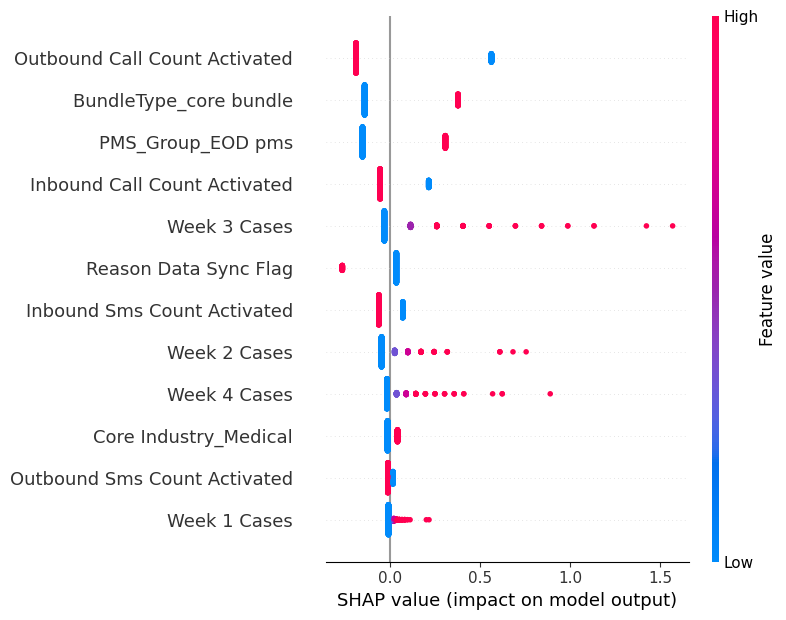

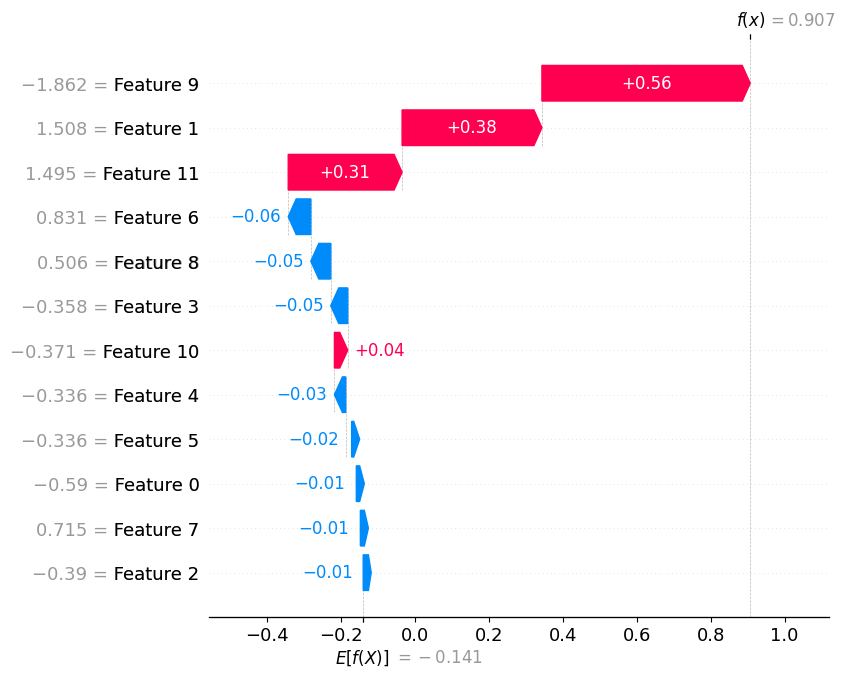

In [10]:
import shap
from sklearn.pipeline import Pipeline

# Get preprocessing only (imputer + scaler)
pre = Pipeline([
    ("imputer", base_clf.named_steps["imputer"]),
    ("scaler",  base_clf.named_steps["scaler"]),
])

X_bg_pre  = pre.transform(X_train.sample(n=min(1000, len(X_train)), random_state=42))
X_val_pre = pre.transform(X_val)

logit = base_clf.named_steps["logit"]  # the logistic model

# LinearExplainer for logistic regression
explainer_lin = shap.LinearExplainer(logit, X_bg_pre, feature_perturbation="interventional")
sv_lin = explainer_lin(X_val_pre)  # matches X_val_pre

# Plot using original feature names for readability
shap.summary_plot(sv_lin, X_val, feature_names=X_val.columns)
shap.plots.waterfall(sv_lin[1], max_display=15)


In [11]:
feature_names = list(X_val.columns)
feature_names

['Core Industry_Medical',
 'BundleType_core bundle',
 'Week 1 Cases',
 'Week 2 Cases',
 'Week 3 Cases',
 'Week 4 Cases',
 'Inbound Sms Count Activated',
 'Outbound Sms Count Activated',
 'Inbound Call Count Activated',
 'Outbound Call Count Activated',
 'Reason Data Sync Flag',
 'PMS_Group_EOD pms']

In [12]:
df = pd.read_csv('2025 churn.csv')

TAG = "(LOCATION_FEATURE_ACCESS_AND_USAGE_BY_MONTH)"

# Build rename map only for columns that contain the tag
rename_map = {}
for col in df.columns:
    if TAG in col:
        # remove the tag first
        base = col.replace(TAG, "").strip()
        # then re-add the tag at the end
        new_name = f"{base}".strip()
        # normalize spaces
        new_name = " ".join(new_name.split())
        rename_map[col] = new_name

# Apply rename
df = df.rename(columns=rename_map)

# (optional) check what changed
print(rename_map)
df

{'Month of Month Ending (First MRR Month) (LOCATION_FEATURE_ACCESS_AND_USAGE_BY_MONTH)': 'Month of Month Ending (First MRR Month)', 'Inbound Sms Count (LOCATION_FEATURE_ACCESS_AND_USAGE_BY_MONTH)': 'Inbound Sms Count', 'Outbound Sms Count (LOCATION_FEATURE_ACCESS_AND_USAGE_BY_MONTH)': 'Outbound Sms Count', 'Automated Sms Sent Count (LOCATION_FEATURE_ACCESS_AND_USAGE_BY_MONTH)': 'Automated Sms Sent Count', 'Manual Messages Sms Count (LOCATION_FEATURE_ACCESS_AND_USAGE_BY_MONTH)': 'Manual Messages Sms Count', 'Inbound Call Count (LOCATION_FEATURE_ACCESS_AND_USAGE_BY_MONTH)': 'Inbound Call Count', 'Outbound Call Count (LOCATION_FEATURE_ACCESS_AND_USAGE_BY_MONTH)': 'Outbound Call Count'}


,Count of FINANCE_ID,Slug,Finance Id,First Month (First MRR Month),Month Ending (Last MRR Month),lifetime in Month,Lifetime Months,Gap,Location Id,Month of Month Ending (First MRR Month),...,Month 7 to 9 Reasons,Month 10 to 12 Reasons,Practice Management Software,Number of Swat,Integrations,Account Status,Reason Billing,Reason Phone System,Reason Data Sync,Reason Auto Reminders
0,248,s00541624,541624,2025-03-31 00:00:00,2025-08-31 00:00:00,4,6,-1,45719cba-2069-46d0-af50-bd243d58b252,2025-03,...,NaN,NaN,Aesthetic Record,1,NaN,Canceled,NaN,NaN,NaN,NaN
1,248,s00665460,665460,2025-01-31 00:00:00,2025-05-31 00:00:00,3,5,-1,ee9d3a93-8906-47f2-9841-0e1454642121,2025-01,...,NaN,NaN,Neon One,1,NaN,Canceled,0.0,0.0,0.0,0.0
2,248,s00190985,190985,2025-02-28 00:00:00,2025-04-30 00:00:00,1,3,-1,bc8a8d23-24ca-481a-86cc-1910377000f4,2025-02,...,NaN,NaN,Tebra,1,NaN,Canceled,NaN,NaN,NaN,NaN
3,248,s00667604,667604,2025-02-28 00:00:00,2025-04-30 00:00:00,1,3,-1,fcc8744f-1b84-45a3-b09d-399cde1b61a2,2025-02,...,NaN,NaN,Jane,1,NaN,Canceled,0.0,0.0,0.0,0.0
4,248,s00367997,367997,2025-04-30 00:00:00,2025-08-31 00:00:00,3,5,-1,7c0537fe-fab7-4376-a627-4a3efdc69168,2025-04,...,NaN,NaN,Crystal PM,1,NaN,Canceled,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,248,s00329144,329144,2025-03-31 00:00:00,2025-08-31 00:00:00,4,6,-1,5c7ea04b-b1b7-40c8-a22c-7e22a80df570,2025-03,...,NaN,NaN,Ortho II Viewpoint,1,Ortho2,Canceled,0.0,0.0,0.0,0.0
244,248,s00223602,223602,2025-03-31 00:00:00,2025-06-30 00:00:00,2,4,-1,96914f42-b150-47f2-bfa4-e156d9fff099,NaN,...,NaN,NaN,Open Dental,1,opendental,Canceled,NaN,NaN,NaN,NaN
245,248,s00609769,609769,2025-02-28 00:00:00,2025-06-30 00:00:00,3,5,-1,88b28fd5-110f-4607-8abd-f3061363534e,2025-02,...,NaN,NaN,Open Dental Cloud,1,opendentalcloud,Canceled,0.0,0.0,0.0,0.0
246,248,s00558227,558227,2025-08-31 00:00:00,2025-09-21 00:00:00,1,2,0,aa8f8a01-2cdc-4dc1-a56a-00edc4c4891e,2025-08,...,NaN,NaN,DaySmart Vet,1,daysmartvet,Canceled,NaN,NaN,NaN,NaN


In [13]:
df.drop(columns=[
    'Count of FINANCE_ID',
    'ListAggDistinct of Cancel Summary (SWAT_CASE)',
    'Created Date (SWAT_CASE)',
    'filter',
    'Max of Cancel Summary (SWAT_CASE)'
], inplace=True)

df = df.dropna(subset=['Slug', 'Finance Id', 'Location Id', 'Location Name'])
df.dropna(how='all', axis=1, inplace=True)

cols = [f"Week {i} Cases" for i in range(1, 13)]
df.dropna(subset=cols, how='any', inplace=True)  # axis=0 is default

cols_1 = [
    'Inbound Sms Count',
    'Outbound Sms Count',
    'Automated Sms Sent Count',
    'Manual Messages Sms Count',
    'Inbound Call Count',
    'Outbound Call Count',
]
df.dropna(subset=cols_1, how='any', inplace=True)

# List of target columns
feature_cols = [
    'Inbound Sms Count',
    'Outbound Sms Count',
    'Automated Sms Sent Count',
    'Manual Messages Sms Count',
    'Inbound Call Count',
    'Outbound Call Count'
]

# For each col, add a new flag col
for col in feature_cols:
    new_col = f"{col} Activated"
    df[new_col] = (df[col] > 9).astype(int)   # 1 if value > 9, else 0

df.dropna(subset=['Core Industry','Practice Management Software','Starting Bundle'],
          how='any', inplace=True)

# Define rules
conditions = [
    df["Starting Bundle"].str.contains("WeaveCore", case=False, na=False),
    df["Starting Bundle"].str.contains("WeavePlus", case=False, na=False),
]
choices = ["core bundle", "plus bundle"]

df["BundleType"] = np.select(conditions, choices, default="other")
# Add First Month
# Add First Month SWAT Cases column to df_all
df["First Month SWAT Cases"] = (
    df["Week 1 Cases"]
    + df["Week 2 Cases"]
    + df["Week 3 Cases"]
    + df["Week 4 Cases"]
)

# Apply rules
df["BundleType"] = np.select(conditions, choices, default="other")

# Regex: Eaglesoft | Open Dental | Dentrix G5 / G5+ / G6 / G6.2-7 / G7
eod_pattern = re.compile(r"(Eaglesoft|Open\s*Dental|Dentrix\s*(G5\+?|G6(?:\.2-7)?|G7))",
                         flags=re.IGNORECASE)

df["PMS_Group"] = np.where(
    df['Practice Management Software'].astype(str).str.contains(eod_pattern, na=False),
    "EOD pms",
    "Others"
)

reason_cols = [
    "Reason Billing",
    "Reason Phone System",
    "Reason Data Sync"
]

for col in reason_cols:
    df[col + " Flag"] = (df[col] > 0).astype(int)

cols_to_dummy = ['Core Industry','PMS_Group','BundleType']  # categorical columns
df = pd.get_dummies(
    df,
    columns=cols_to_dummy,
    drop_first=False,   # keep all categories
    dummy_na=False,    
    dtype="int8"
)

df["churn_flag"] = df["Churn or Retain"].map({"Churn": 1, "Retain": 0})


/var/folders/4x/2k_662s11w3498vbf_1sv9q00000gn/T/ipykernel_15981/3935098837.py:68: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df['Practice Management Software'].astype(str).str.contains(eod_pattern, na=False),


In [14]:
# Define predictors (X) and response variable (y)
X_2025 = df[["Core Industry_Medical",
       "BundleType_core bundle",
           'Week 1 Cases', 'Week 2 Cases',
       'Week 3 Cases', 'Week 4 Cases',#"First Month SWAT Cases",
      'Inbound Sms Count Activated',
     'Outbound Sms Count Activated',
    #'Automated Sms Sent Count Activated',
    #'Manual Messages Sms Count Activated',
    'Inbound Call Count Activated',
     'Outbound Call Count Activated',
            #'Inbound Sms Count',
    #'Outbound Sms Count',
    #'Automated Sms Sent Count',
    #'Manual Messages Sms Count',
    #'Inbound Call Count',
    # 'Outbound Call Count',
    #'Reason Billing Flag',
    #"Reason Phone System Flag",
    "Reason Data Sync Flag",
    "PMS_Group_EOD pms"
]]


y_2025 = df["churn_flag"]

In [15]:
scored_test  = score_split(X_2025,  y_2025,  "test",  calibrated, best_thr)
scored_test = scored_test[["split", "y_true", "y_proba", "y_pred", "threshold_used"]]
scored_test = df.join(scored_test, how="left")
scored_test.groupby(['y_true', 'y_pred']).agg({'Starting Mrr': 'sum'})
scored_test.groupby(['y_true', 'y_pred']).size()



y_true  y_pred
1       0         62
        1         84
dtype: int64

In [16]:
p = calibrated.predict_proba(X_2025)[:, 1]

core    = (scored_test["BundleType_core bundle"] == 1).astype(int)
eod     = (scored_test["PMS_Group_EOD pms"] == 1).astype(int)
outsms  = scored_test["Outbound Sms Count Activated"].fillna(0).astype(int)
outcall = scored_test["Outbound Call Count Activated"].fillna(0).astype(int)
insms   = scored_test["Inbound Sms Count Activated"].fillna(0).astype(int)
incall  = scored_test["Inbound Call Count Activated"].fillna(0).astype(int)

bri = (p * (1 + 0.30*core)
         * (1 + 0.15*eod)
         * (1 + 0.15*outsms)
         * (1 - 0.25*outcall)
         * (1 - 0.35*insms)
         * (1 - 0.33*incall))

bri = np.clip(bri, 0, 1)

risk_table = pd.DataFrame({
    "p_churn": p,
    "business_risk_index": bri
}, index=scored_test.index)

risk_table["rank_by_p"]   = risk_table["p_churn"].rank(ascending=False, method="first").astype(int)
risk_table["rank_by_bri"] = risk_table["business_risk_index"].rank(ascending=False, method="first").astype(int)

risk_table = risk_table.sort_values("business_risk_index", ascending=False)


In [17]:
scored_test = scored_test.join(risk_table, how="left")
scored_test

,Slug,Finance Id,First Month (First MRR Month),Month Ending (Last MRR Month),lifetime in Month,Lifetime Months,Gap,Location Id,Month of Month Ending (First MRR Month),Location Name,...,churn_flag,split,y_true,y_proba,y_pred,threshold_used,p_churn,business_risk_index,rank_by_p,rank_by_bri
0,s00541624,541624,2025-03-31 00:00:00,2025-08-31 00:00:00,4,6,-1,45719cba-2069-46d0-af50-bd243d58b252,2025-03,Lavender Medi Spa,...,1,test,1,0.227273,1,0.205128,0.227273,0.295455,1,2
1,s00665460,665460,2025-01-31 00:00:00,2025-05-31 00:00:00,3,5,-1,ee9d3a93-8906-47f2-9841-0e1454642121,2025-01,EBeauty Community for Cancer Support,...,1,test,1,0.227273,1,0.205128,0.227273,0.295455,2,3
3,s00667604,667604,2025-02-28 00:00:00,2025-04-30 00:00:00,1,3,-1,fcc8744f-1b84-45a3-b09d-399cde1b61a2,2025-02,New Dawn Chiropractic & Acupuncture,...,1,test,1,0.227273,1,0.205128,0.227273,0.295455,3,4
4,s00367997,367997,2025-04-30 00:00:00,2025-08-31 00:00:00,3,5,-1,7c0537fe-fab7-4376-a627-4a3efdc69168,2025-04,Eye Wares - Mandeville,...,1,test,1,0.078767,0,0.205128,0.078767,0.067937,85,85
5,s00667564,667564,2025-02-28 00:00:00,2025-05-31 00:00:00,2,4,-1,8cdac57c-b3e9-40a7-88cf-9e6225a5eef3,2025-02,Soul and Body Healing Studio,...,1,test,1,0.227273,1,0.205128,0.227273,0.339773,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,s00436902,436902,2025-03-31 00:00:00,2025-05-31 00:00:00,1,3,-1,39eb4754-898d-48c3-bf66-68f862288df0,2025-03,Race Track Smiles,...,1,test,1,0.205128,1,0.205128,0.205128,0.088607,84,84
242,s00660806,660806,2025-01-31 00:00:00,2025-06-30 00:00:00,4,6,-1,2f97851b-0bcd-4c15-8d23-370e92e0cd33,2025-01,Furz Mobile Vet Clinic,...,1,test,1,0.227273,1,0.205128,0.227273,0.227273,72,53
243,s00329144,329144,2025-03-31 00:00:00,2025-08-31 00:00:00,4,6,-1,5c7ea04b-b1b7-40c8-a22c-7e22a80df570,2025-03,Janzen & Chwa Orthodontics Ltd.,...,1,test,1,0.078767,0,0.205128,0.078767,0.029586,124,125
245,s00609769,609769,2025-02-28 00:00:00,2025-06-30 00:00:00,3,5,-1,88b28fd5-110f-4607-8abd-f3061363534e,2025-02,Detroit Dentist Dentures & Implants,...,1,test,1,0.078767,0,0.205128,0.078767,0.052345,125,92
